In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
# idée de cette base : rejeter le moins possible de clients pouvant rembourser (faux négatif), mais surtout éviter les clients qui ne rembourseront pas (faux positif)

#Hence ROC-AUC score is an important metric since it covers both scenarios where Home Credit can suffer loss. ROC-AUC score should be greater than 0.5 which means your model is doing something right.

path = "csv"
dir_list = os.listdir(path)

db = dict()

for csv in dir_list:

    try:
        db[csv] = pd.read_csv(path+"//"+csv)
    except:
        db[csv] = pd.read_csv(path+"//"+csv, encoding="latin1")
db.keys()
# bureau : tous les anciens prêts liés au client reporté par crédit bureau
# bureau balance : solde mensuel des crédits 
# POS_CASH_balance : pareil que bureau balance, pour home crédit
# previous_application : les anciens prêts auprès d'home crédit
# installments_payments : historique des remboursements des anciens prêts auprès d'home crédit

dict_keys(['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv'])

In [3]:
application = db["application_train.csv"].copy()
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


application_train.csv


Text(0.5, 1.0, 'Jeu de données déséquilibré')

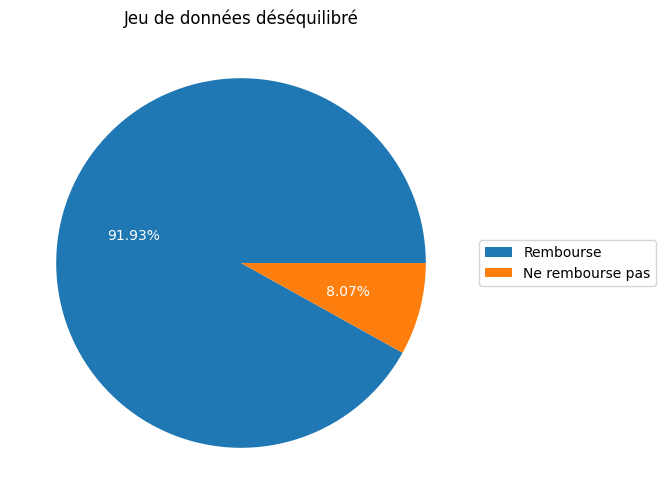

In [4]:
print (dir_list[1])
db[dir_list[1]].head(5)

# données principales de prêt divisées en test/train
# NAME_CONTRACT_TYPE : prêt renouvelable / prêt standard
# own car/ realty : voiture / immobilier
# children : nombre
# income total : revenu (année?)
# credit : autres prêts?
# annuity : rentes
# 

fig, ax = plt.subplots(figsize=(6, 6))
data = db[dir_list[1]]['TARGET'].value_counts().values

wedges, pct, autotexts = ax.pie(data, autopct='%.2f%%', textprops=dict(color="w"))

ax.legend(wedges, ['Rembourse', 'Ne rembourse pas'],
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title("Jeu de données déséquilibré", )

application (train/test)

SK_ID : clé primaire
Target : 1 retard de payement ou difficultés / 0 autre

NAME_CONTRACT_TYPE : prêt renouvelable / prêt standard
own car/ realty : voiture / immobilier
children : nombre
income total : revenu (année?)
amt_credit : montant du crédit
annuity : montant restant de la dette
good_price : montant des biens acheté avec le prêt
NAME_TYPE_SUITE : accompagné (seul, famille, épouse/concubin,enfant,autre,amis...)
NAME_INCOME_TYPE : source des revenus (métier, autre)


-------------------------


features dont l'utilité est a démontrer :
REGION_POPULATION_RELATIVE (0 = trou paumé)
DAYS_EMPLOYED : jours d'emploi avant contraction du prêt
DAYS_REGISTRATION : jours avant le changement de l'enregistrement
DAYS_ID_PUBLISH : 

OWN_CAR_AGE : age du véhicule personnel

quel contact le client a laissé

FLAG_MOBIL
FLAG_EMP_PHONE  pas de telephone?
FLAG_WORK_PHONE
FLAG_CONT_MOBILE : joignable
FLAG_PHONE
FLAG_EMAIL

OCCUPATION_TYPE : hobbies?
CNT_FAM_MEMBERS : membres dans la famille

estimation des régions par la banque 1,2,3

REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY

heure, jour de signature

WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START

addresse non exacte

REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY




In [6]:
application["NAME_CONTRACT_TYPE"]

0              Cash loans
1              Cash loans
2         Revolving loans
3              Cash loans
4              Cash loans
               ...       
307506         Cash loans
307507         Cash loans
307508         Cash loans
307509         Cash loans
307510         Cash loans
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: object

In [15]:
plot1.index

Index(['Cash loans', 'Revolving loans'], dtype='object')

Text(0.5, 1.0, 'Influence du type de prêt')

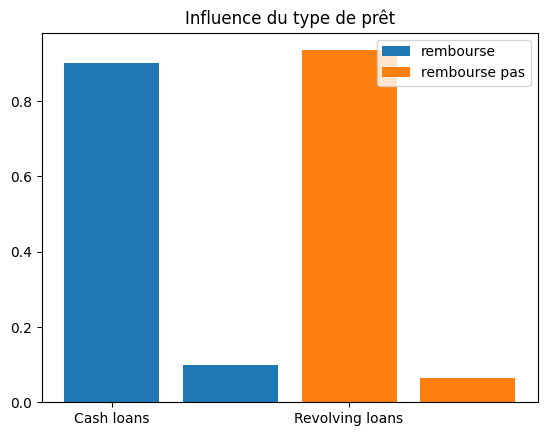

In [18]:
plot1 = application["NAME_CONTRACT_TYPE"].where (application.TARGET==0).value_counts()
plot2 = application["NAME_CONTRACT_TYPE"].where (application.TARGET==1).value_counts()

plt.bar ((0.5,1),plot1/plot1.sum(),width=0.4,label="rembourse")
plt.bar ((1.5,2),plot2/plot2.sum(),width=0.4,label="rembourse pas")
plt.xticks ([0.5,1.5],[plot1.index[0],plot1.index[1]])
plt.legend()
plt.title ("Influence du type de prêt")

Text(0.5, 1.0, 'Influence du sexe de la personne')

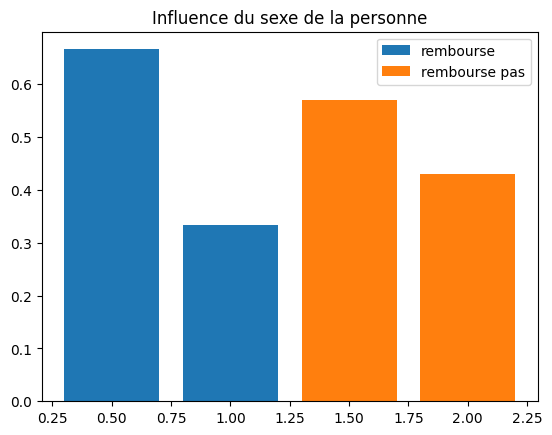

In [63]:
plot1 = application["CODE_GENDER"].where (application.TARGET==0).value_counts()[0:2]
plot2 = application["CODE_GENDER"].where (application.TARGET==1).value_counts()[0:2]

plt.bar ((0.5,1),plot1/plot1.sum(),width=0.4,label="rembourse")
plt.bar ((1.5,2),plot2/plot2.sum(),width=0.4,label="rembourse pas")
plt.legend()
plt.title ("Influence du sexe de la personne")

Text(0.5, 1.0, "Possession d'une voiture")

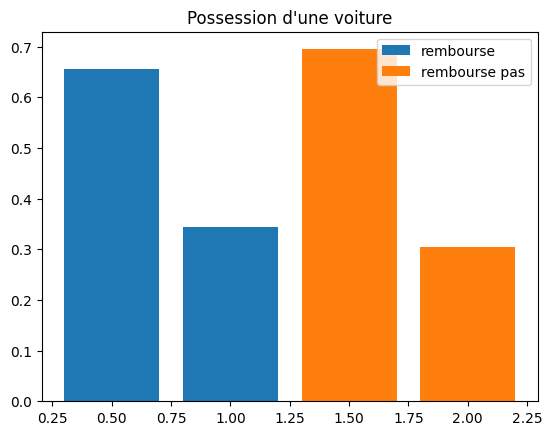

In [64]:
plot1 = application["FLAG_OWN_CAR"].where (application.TARGET==0).value_counts()[0:2]
plot2 = application["FLAG_OWN_CAR"].where (application.TARGET==1).value_counts()[0:2]

plt.bar ((0.5,1),plot1/plot1.sum(),width=0.4,label="rembourse")
plt.bar ((1.5,2),plot2/plot2.sum(),width=0.4,label="rembourse pas")
plt.legend()
plt.title ("Possession d'une voiture")

Text(0.5, 1.0, "Possession d'un bien immobilier")

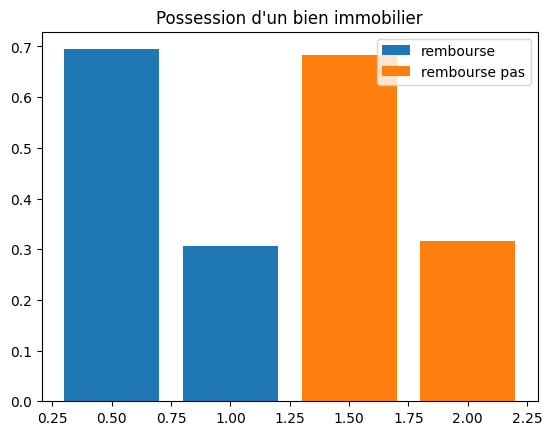

In [65]:
plot1 = application["FLAG_OWN_REALTY"].where (application.TARGET==0).value_counts()[0:2]
plot2 = application["FLAG_OWN_REALTY"].where (application.TARGET==1).value_counts()[0:2]

plt.bar ((0.5,1),plot1/plot1.sum(),width=0.4,label="rembourse")
plt.bar ((1.5,2),plot2/plot2.sum(),width=0.4,label="rembourse pas")
plt.legend()
plt.title ("Possession d'un bien immobilier")

Text(0.5, 1.0, "remboursement en fonction du nombre d'enfants")

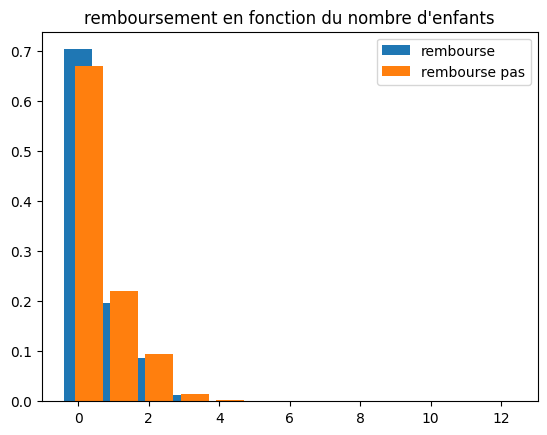

In [20]:
plot1 = application["CNT_CHILDREN"].where (application.TARGET==0).value_counts()
plot2 = application["CNT_CHILDREN"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="rembourse")
plt.bar (np.arange(len(plot2))+0.3,plot2/plot2.sum(),label="rembourse pas")
plt.legend()
plt.title ("remboursement en fonction du nombre d'enfants")

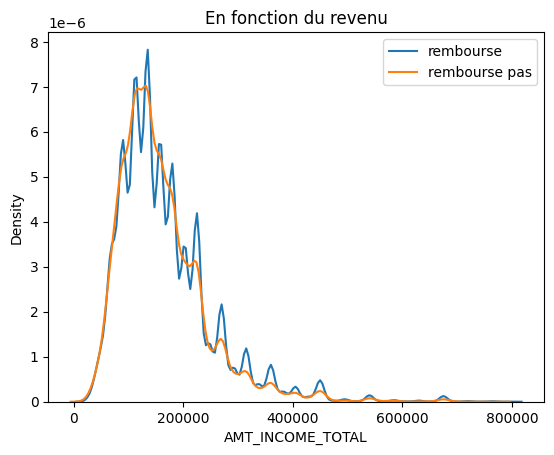

In [67]:
# detecton d'un outlier, mise à l'échelle
sns.kdeplot(application.loc[(application['TARGET'] == 0) & (application['AMT_INCOME_TOTAL']<(0.8*1e6)), 'AMT_INCOME_TOTAL'] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1) & (application['AMT_INCOME_TOTAL']<(0.8*1e6)), 'AMT_INCOME_TOTAL'] , label = 'rembourse pas').set_title ("En fonction du revenu")
plt.legend()

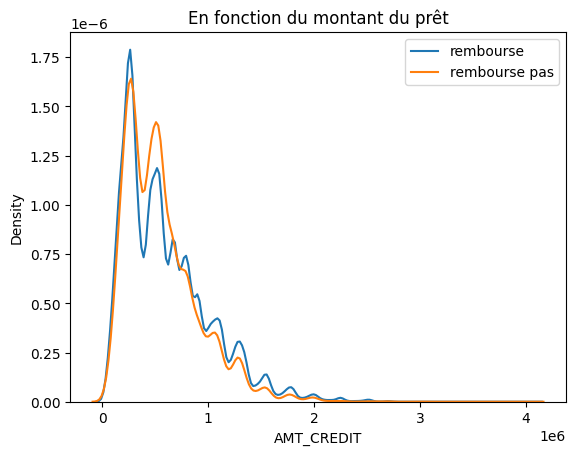

In [68]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), 'AMT_CREDIT'] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), 'AMT_CREDIT'] , label = 'rembourse pas').set_title ("En fonction du montant du prêt")
plt.legend()
# moins de remboursement sur des crédits plus faibles

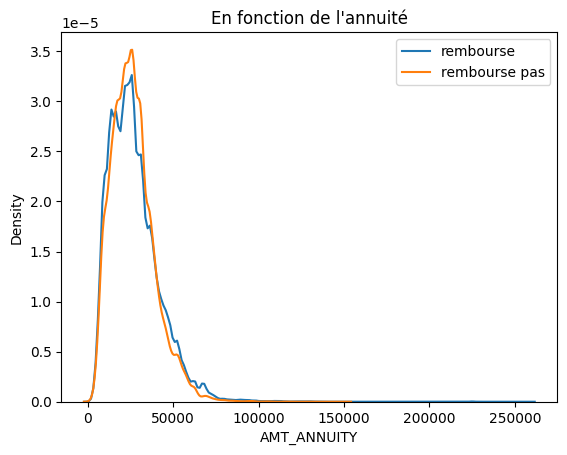

In [69]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), 'AMT_ANNUITY'] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), 'AMT_ANNUITY'] , label = 'rembourse pas').set_title ("En fonction de l'annuité")
plt.legend()


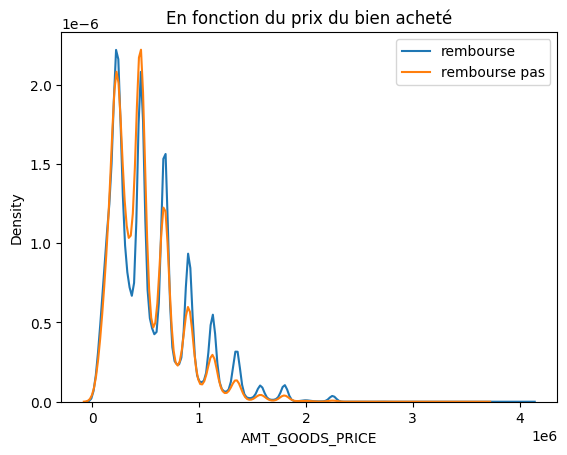

In [70]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), 'AMT_GOODS_PRICE'] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), 'AMT_GOODS_PRICE'] , label = 'rembourse pas').set_title ("En fonction du prix du bien acheté")
plt.legend()

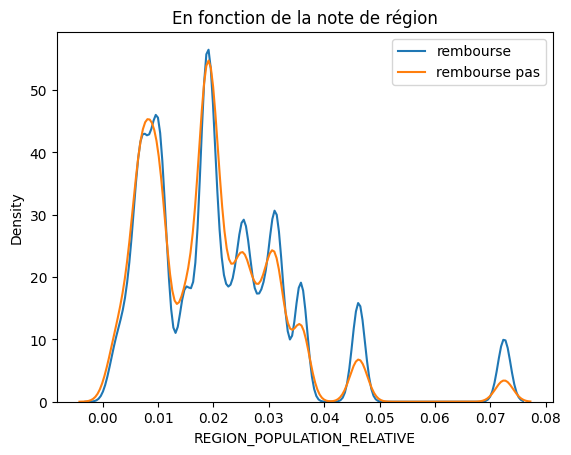

In [71]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "REGION_POPULATION_RELATIVE"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "REGION_POPULATION_RELATIVE"] , label = 'rembourse pas').set_title ("En fonction de la note de région")
plt.legend()

# bar plot

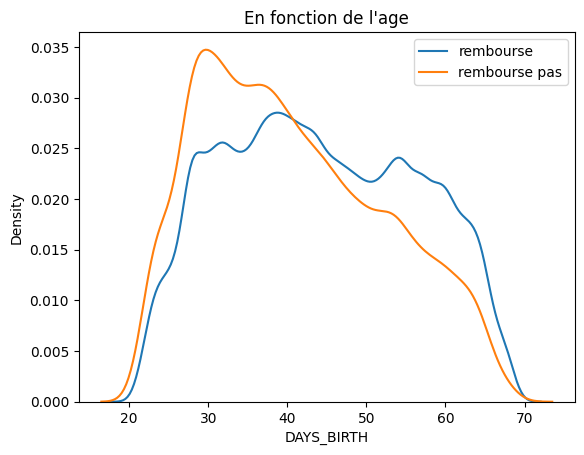

In [72]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "DAYS_BIRTH"]/-365 , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "DAYS_BIRTH"]/-365 , label = 'rembourse pas').set_title ("En fonction de l'age")
plt.legend()

In [73]:
display (application.DAYS_EMPLOYED.value_counts(ascending=False)) # beaucoup de lignes avec une valeur > 1000 ans de travail
applibis = application.copy()
applibis.DAYS_EMPLOYED = application.DAYS_EMPLOYED.replace (365243,np.nan)

 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-13961         1
-11827         1
-10176         1
-9459          1
-8694          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

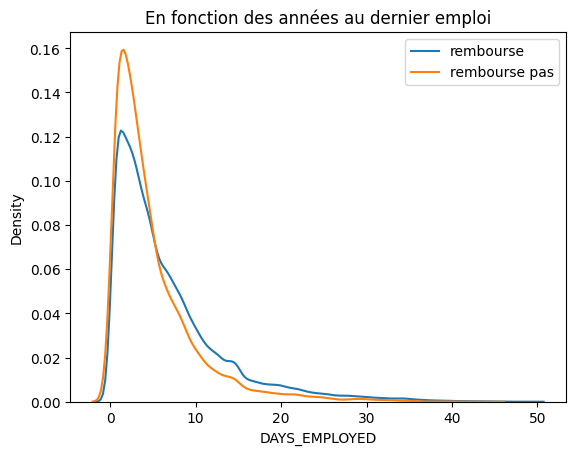

In [74]:
sns.kdeplot(applibis.loc[(application['TARGET'] == 0), "DAYS_EMPLOYED"]/-365 , label = 'rembourse')
sns.kdeplot(applibis.loc[(application['TARGET'] == 1), "DAYS_EMPLOYED"]/-365 , label = 'rembourse pas').set_title ("En fonction des années au dernier emploi")
plt.legend()
# données interressantes, mais au prix de 55374 clients en moins

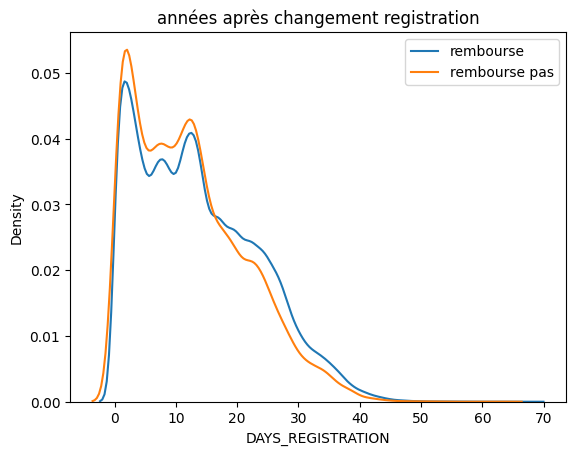

In [75]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "DAYS_REGISTRATION"]/-365 , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "DAYS_REGISTRATION"]/-365 , label = 'rembourse pas').set_title ("années après changement registration")
plt.legend()

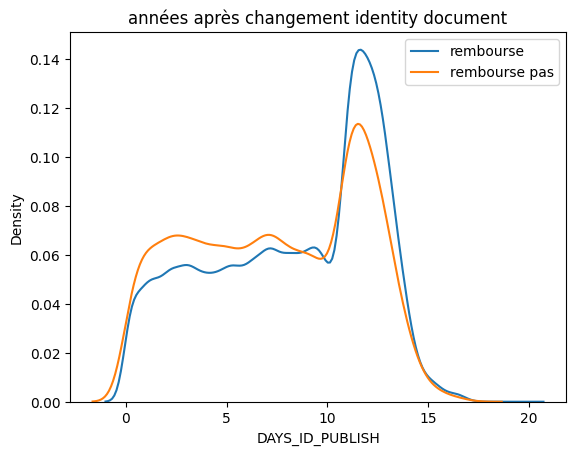

In [76]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "DAYS_ID_PUBLISH"]/-365 , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "DAYS_ID_PUBLISH"]/-365 , label = 'rembourse pas').set_title ("années après changement identity document")
plt.legend()

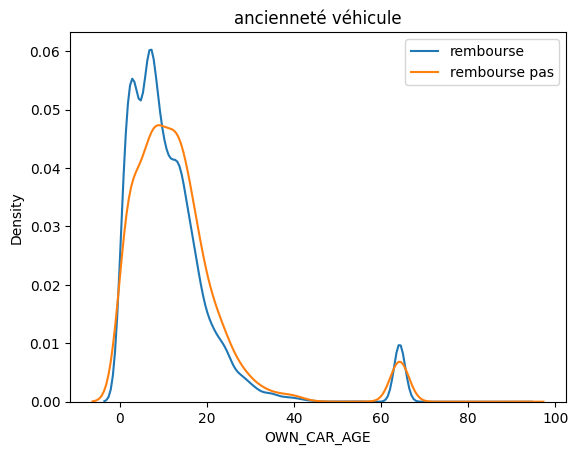

In [77]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "OWN_CAR_AGE"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "OWN_CAR_AGE"] , label = 'rembourse pas').set_title ("ancienneté véhicule")
plt.legend()
# influence d'un véhicule récent

Text(0.5, 1.0, 'remboursement en fonction du nb de membres famille')

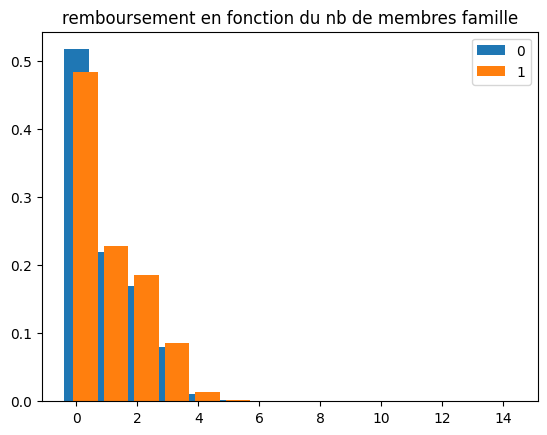

In [78]:
plot1 = application["CNT_FAM_MEMBERS"].where (application.TARGET==0).value_counts()
plot2 = application["CNT_FAM_MEMBERS"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="0")
plt.bar (np.arange(len(plot2))+0.3,plot2/plot2.sum(),label="1")
plt.legend()
plt.title ("remboursement en fonction du nb de membres famille")

Text(0.5, 1.0, 'remboursement en fonction de la notation de la région')

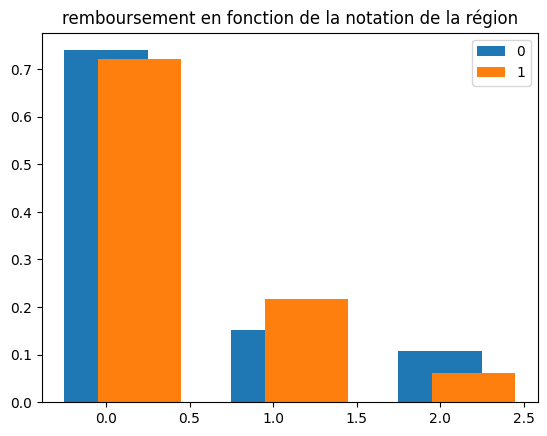

In [79]:
plot1 = application["REGION_RATING_CLIENT"].where (application.TARGET==0).value_counts()
plot2 = application["REGION_RATING_CLIENT"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="0",width=0.5)
plt.bar (np.arange(len(plot2))+0.2,plot2/plot2.sum(),label="1",width=0.5)
plt.legend()
plt.title ("remboursement en fonction de la notation de la région")

Text(0.5, 1.0, 'remboursement en fonction de la notation de la région & présence ville')

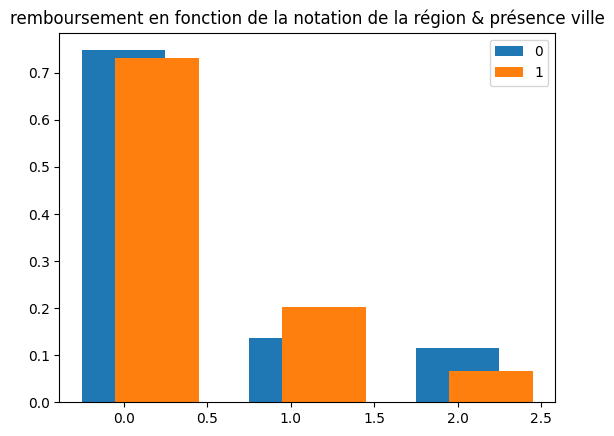

In [80]:
plot1 = application["REGION_RATING_CLIENT_W_CITY"].where (application.TARGET==0).value_counts()
plot2 = application["REGION_RATING_CLIENT_W_CITY"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="0",width=0.5)
plt.bar (np.arange(len(plot2))+0.2,plot2/plot2.sum(),label="1",width=0.5)
plt.legend()
plt.title ("remboursement en fonction de la notation de la région & présence ville")

In [81]:
plot2/plot2.sum()

2.0    0.731923
3.0    0.201450
1.0    0.066626
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

Text(0.5, 1.0, 'région donnée fausse')

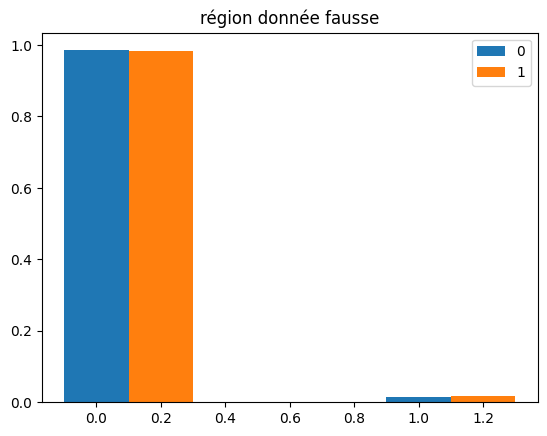

In [82]:
plot1 = application["REG_REGION_NOT_LIVE_REGION"].where (application.TARGET==0).value_counts()
plot2 = application["REG_REGION_NOT_LIVE_REGION"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="0",width=0.2)
plt.bar (np.arange(len(plot2))+0.2,plot2/plot2.sum(),label="1",width=0.2)
plt.legend()
plt.title ("région donnée fausse")

Text(0.5, 1.0, 'région de travail donnée fausse')

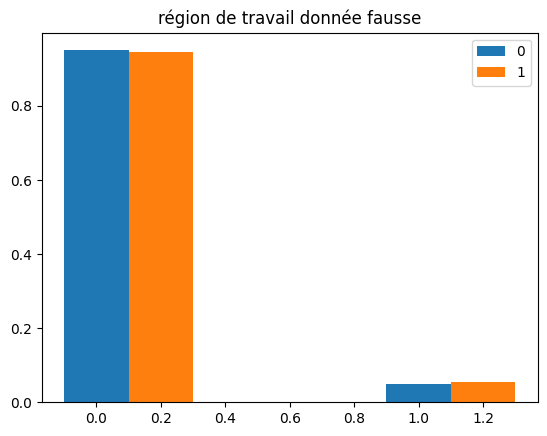

In [83]:
plot1 = application["REG_REGION_NOT_WORK_REGION"].where (application.TARGET==0).value_counts()
plot2 = application["REG_REGION_NOT_WORK_REGION"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="0",width=0.2)
plt.bar (np.arange(len(plot2))+0.2,plot2/plot2.sum(),label="1",width=0.2)
plt.legend()
plt.title ("région de travail donnée fausse")

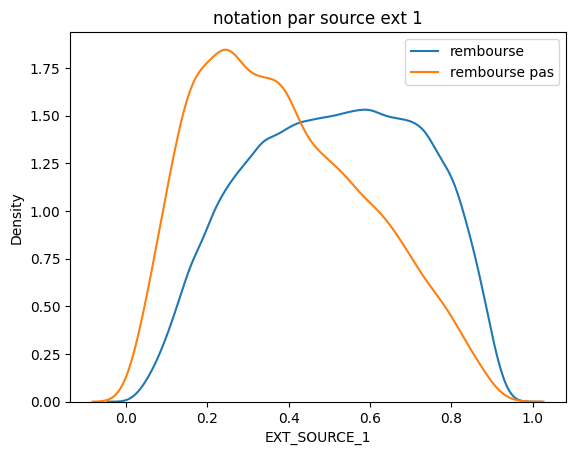

In [84]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "EXT_SOURCE_1"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "EXT_SOURCE_1"] , label = 'rembourse pas').set_title ("notation par source ext 1")
plt.legend()
# la notation s'avère importante

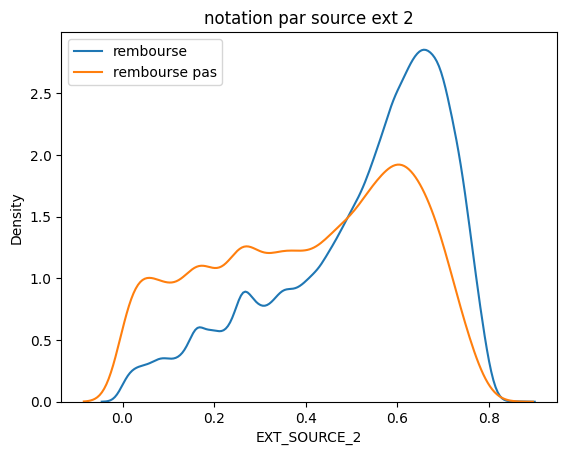

In [85]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "EXT_SOURCE_2"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "EXT_SOURCE_2"] , label = 'rembourse pas').set_title ("notation par source ext 2")
plt.legend()
# majorité des clients fiables prise en compte, mais aussi des clients moins fiables

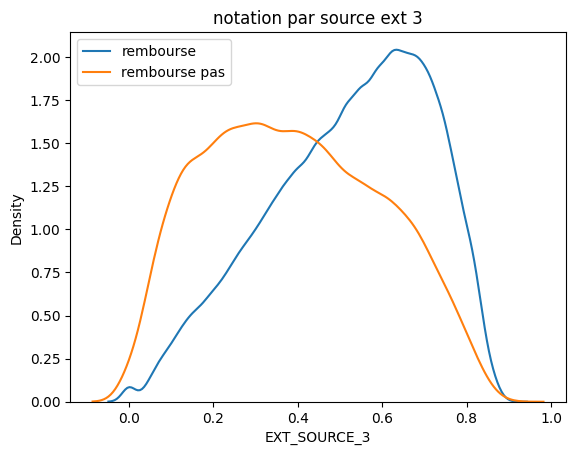

In [86]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "EXT_SOURCE_3"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "EXT_SOURCE_3"] , label = 'rembourse pas').set_title ("notation par source ext 3")
plt.legend()

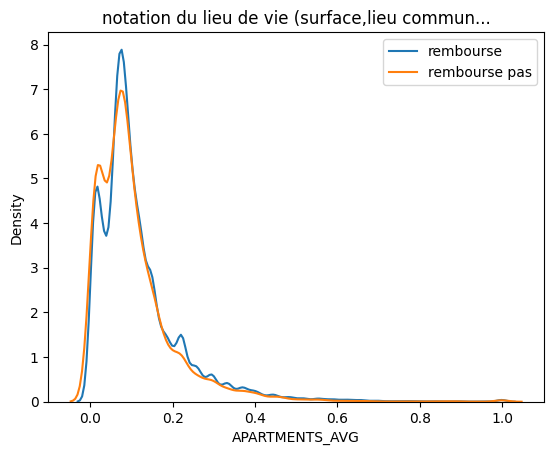

In [87]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "APARTMENTS_AVG"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "APARTMENTS_AVG"] , label = 'rembourse pas').set_title ("notation du lieu de vie (surface,lieu commun...")
plt.legend()

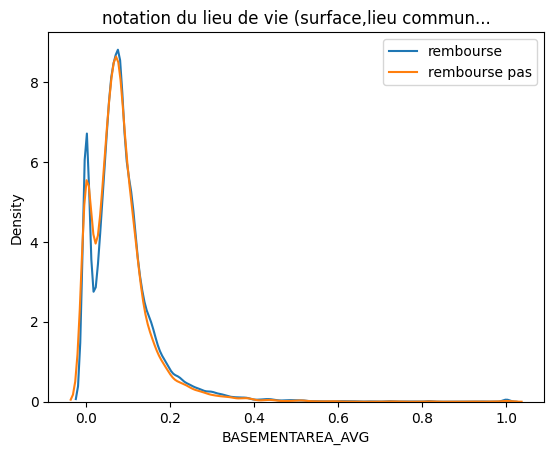

In [88]:
sns.kdeplot(application.loc[(application['TARGET'] == 0), "BASEMENTAREA_AVG"] , label = 'rembourse')
sns.kdeplot(application.loc[(application['TARGET'] == 1), "BASEMENTAREA_AVG"] , label = 'rembourse pas').set_title ("notation du lieu de vie (surface,lieu commun...")
plt.legend()

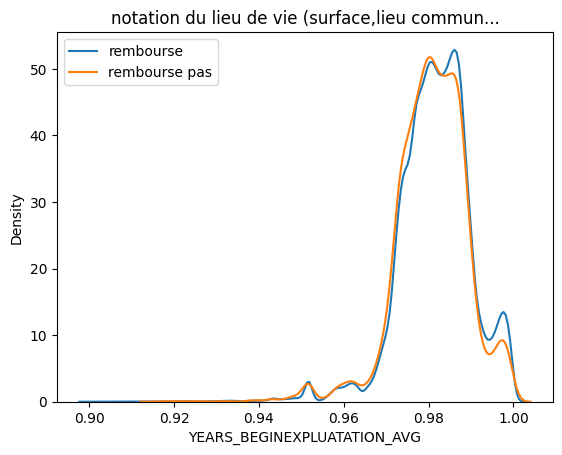

In [89]:
sns.kdeplot(application.loc[((application['TARGET'] == 0) & (application['YEARS_BEGINEXPLUATATION_AVG'] > 0.9)), "YEARS_BEGINEXPLUATATION_AVG"] , label = 'rembourse')
sns.kdeplot(application.loc[((application['TARGET'] == 1) & (application['YEARS_BEGINEXPLUATATION_AVG'] > 0.9)), "YEARS_BEGINEXPLUATATION_AVG"] , label = 'rembourse pas').set_title ("notation du lieu de vie (surface,lieu commun...")
plt.legend()

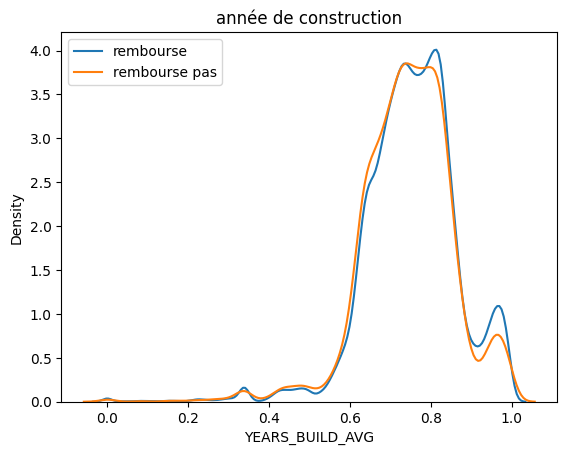

In [90]:
sns.kdeplot(application.loc[((application['TARGET'] == 0)), "YEARS_BUILD_AVG"] , label = 'rembourse')
sns.kdeplot(application.loc[((application['TARGET'] == 1)), "YEARS_BUILD_AVG"] , label = 'rembourse pas').set_title ("année de construction")
plt.legend()

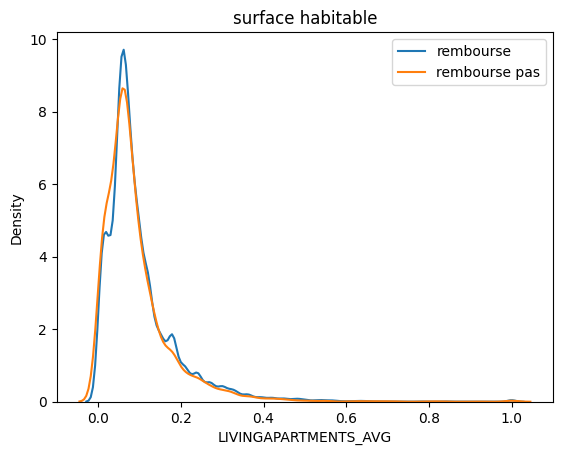

In [91]:
sns.kdeplot(application.loc[((application['TARGET'] == 0)), "LIVINGAPARTMENTS_AVG"] , label = 'rembourse')
sns.kdeplot(application.loc[((application['TARGET'] == 1)), "LIVINGAPARTMENTS_AVG"] , label = 'rembourse pas').set_title ("surface habitable")
plt.legend()

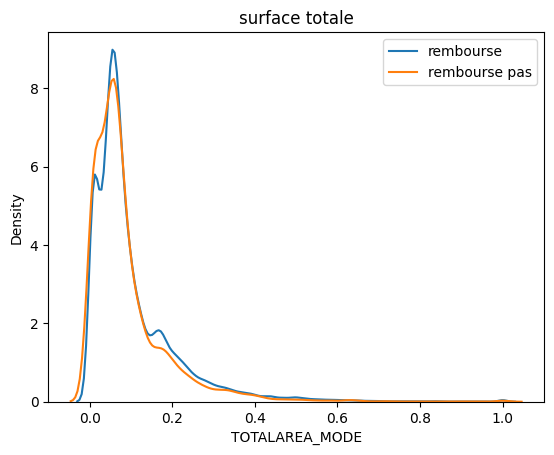

In [92]:
sns.kdeplot(application.loc[((application['TARGET'] == 0)), "TOTALAREA_MODE"] , label = 'rembourse')
sns.kdeplot(application.loc[((application['TARGET'] == 1)), "TOTALAREA_MODE"] , label = 'rembourse pas').set_title ("surface totale")
plt.legend()

Text(0.5, 1.0, 'emergency state')

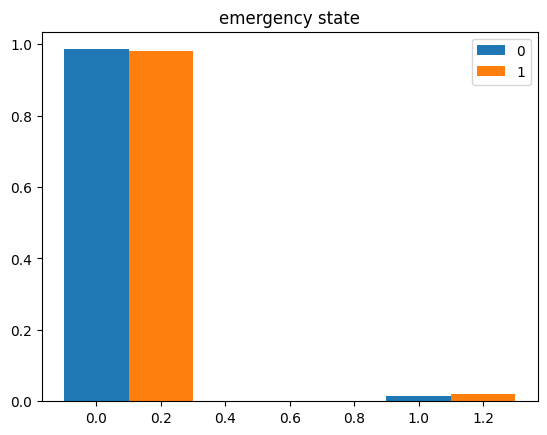

In [93]:
plot1 = application["EMERGENCYSTATE_MODE"].where (application.TARGET==0).value_counts()
plot2 = application["EMERGENCYSTATE_MODE"].where (application.TARGET==1).value_counts()

plt.bar (range(len(plot1)),plot1/plot1.sum(),label="0",width=0.2)
plt.bar (np.arange(len(plot2))+0.2,plot2/plot2.sum(),label="1",width=0.2)
plt.legend()
plt.title ("emergency state")

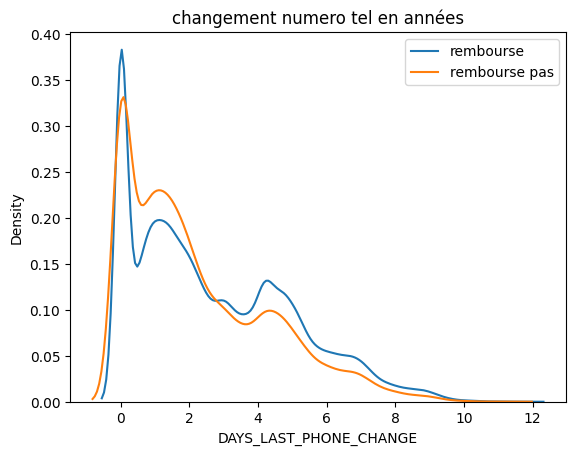

In [94]:
sns.kdeplot(application.loc[((application['TARGET'] == 0)), "DAYS_LAST_PHONE_CHANGE"]/-365 , label = 'rembourse')
sns.kdeplot(application.loc[((application['TARGET'] == 1)), "DAYS_LAST_PHONE_CHANGE"]/-365 , label = 'rembourse pas').set_title ("changement numero tel en années")
plt.legend()

In [95]:
application.loc[application.TARGET==0,"FLAG_DOCUMENT_18"].value_counts()


0    280328
1      2358
Name: FLAG_DOCUMENT_18, dtype: int64

In [96]:
#96-115 les documents remis
liste_doc_remis = pd.DataFrame()
liste_tar_0 = []
liste_tar_1 = []

for i in application.iloc[:,96:115]:
    target0 = (application.loc[application.TARGET==0,i].value_counts())
    target1 =  (application.loc[application.TARGET==1,i].value_counts())

    liste_tar_0.append (target0[0]/target0.sum())
    liste_tar_1.append (target1[0]/target1.sum())

liste_doc_remis["rembourse"] = liste_tar_0
liste_doc_remis["rembourse pas"] = liste_tar_1

liste_doc_remis.sort_values (by="rembourse pas")

,rembourse,rembourse pas
1,0.295940,0.222075
6,0.917973,0.926042
4,0.909543,0.939295
3,0.984874,0.985015
14,0.989731,0.993958
16,0.991659,0.994280
9,0.996010,0.996979
7,0.996024,0.997019
12,0.996912,0.998792
11,0.996271,0.998792


In [97]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [98]:
pd.set_option('display.max_columns', None)
colonnes_app = ["SK_ID_CURR","TARGET","FLAG_OWN_CAR","OWN_CAR_AGE","FLAG_OWN_REALTY","CNT_CHILDREN","CNT_FAM_MEMBERS",
                'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE',"DAYS_BIRTH","DAYS_EMPLOYED",
                "EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3"]
application[colonnes_app].head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,100002,1,N,NaN,Y,0,1.0,202500.0,406597.5,351000.0,-9461,-637,0.083037,0.262949,0.139376
1,100003,0,N,NaN,N,0,2.0,270000.0,1293502.5,1129500.0,-16765,-1188,0.311267,0.622246,NaN
2,100004,0,Y,26.0,Y,0,1.0,67500.0,135000.0,135000.0,-19046,-225,NaN,0.555912,0.729567
3,100006,0,N,NaN,Y,0,2.0,135000.0,312682.5,297000.0,-19005,-3039,NaN,0.650442,NaN
4,100007,0,N,NaN,Y,0,1.0,121500.0,513000.0,513000.0,-19932,-3038,NaN,0.322738,NaN


In [99]:
application.SK_ID_CURR.value_counts()>1

100002    False
337664    False
337661    False
337660    False
337659    False
          ...  
218992    False
218991    False
218990    False
218989    False
456255    False
Name: SK_ID_CURR, Length: 307511, dtype: bool

In [100]:
application.loc[application.duplicated()]
application.SK_ID_CURR.where(application.SK_ID_CURR.value_counts()>1).notna().sum()

0

In [101]:
bureau = db["bureau.csv"].copy()
# DAYS_CREDIT : jour depuis la contraction du crédit précédent avant la demande 
# CREDIT_DAY_OVERDUE nombre de jours de retard de paiement au moment de la demande
# DAYS_ENDDATE_FACT : fin du dernier crédit si celui ci remboursé
# AMT_CREDIT_MAX_OVERDUE montant maximal du lors d'un retard de remboursement
# AMT_CREDIT_SUM montant actuel crédit bureau
# AMT_CREDIT_SUM_DEBT dette actuelle sur crédit bureau
# AMT_CREDIT_SUM_LIMIT limite montant crédit reporté
# AMT_CREDIT_SUM_OVERDUE montant actuel du en retard

#bureau[["SK_ID_CURR","AMT_CREDIT_SUM"]].sort_values(by="AMT_CREDIT_SUM",ascending=False)

#bureau[bureau["SK_ID_CURR"]=="367343"].sort_values(by="CREDIT_DAY_OVERDUE")
bureau.AMT_CREDIT_SUM_DEBT

0               0.0
1          171342.0
2               NaN
3               NaN
4               NaN
             ...   
1716423     11250.0
1716424         0.0
1716425         NaN
1716426         0.0
1716427         0.0
Name: AMT_CREDIT_SUM_DEBT, Length: 1716428, dtype: float64

In [102]:
bur_n = pd.DataFrame()
bur_n["nb_credit"] = bureau.groupby("SK_ID_CURR")["CREDIT_ACTIVE"].size()
bur_n["nb_credit_actifs"] = bureau.replace ({"Active":1,"Sold":0,"Bad debt":0,"Closed":0}).groupby("SK_ID_CURR")["CREDIT_ACTIVE"].sum()
bur_n["jour_dernier_credit"] = bureau.groupby("SK_ID_CURR")["DAYS_CREDIT"].max()
bur_n["jours_retard_credit_cb"] = bureau.groupby("SK_ID_CURR")["CREDIT_DAY_OVERDUE"].max()
bur_n["max_impaye"] = bureau.groupby("SK_ID_CURR")["AMT_CREDIT_MAX_OVERDUE"].max()
bur_n["montant_credits_total"] = bureau.groupby("SK_ID_CURR")["AMT_CREDIT_SUM"].sum()
bur_n["nb_prolongation_credit_max"] = bureau.groupby("SK_ID_CURR")["CNT_CREDIT_PROLONG"].max()
bur_n["dette_due_actuelle_total"] = bureau.groupby("SK_ID_CURR")["AMT_CREDIT_SUM_DEBT"].max()

df = application[colonnes_app].join (bur_n, on="SK_ID_CURR")

df.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,nb_credit,nb_credit_actifs,jour_dernier_credit,jours_retard_credit_cb,max_impaye,montant_credits_total,nb_prolongation_credit_max,dette_due_actuelle_total
0,100002,1,N,NaN,Y,0,1.0,202500.0,406597.5,351000.0,-9461,-637,0.083037,0.262949,0.139376,8.0,2.0,-103.0,0.0,5043.645,865055.565,0.0,245781.0
1,100003,0,N,NaN,N,0,2.0,270000.0,1293502.5,1129500.0,-16765,-1188,0.311267,0.622246,NaN,4.0,1.0,-606.0,0.0,0.000,1017400.500,0.0,0.0
2,100004,0,Y,26.0,Y,0,1.0,67500.0,135000.0,135000.0,-19046,-225,NaN,0.555912,0.729567,2.0,0.0,-408.0,0.0,0.000,189037.800,0.0,0.0
3,100006,0,N,NaN,Y,0,2.0,135000.0,312682.5,297000.0,-19005,-3039,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,N,NaN,Y,0,1.0,121500.0,513000.0,513000.0,-19932,-3038,NaN,0.322738,NaN,1.0,0.0,-1149.0,0.0,0.000,146250.000,0.0,0.0


In [103]:
previous_app = db["previous_application.csv"]

In [104]:
prev = pd.DataFrame()

prev["demande_credit_med"] = previous_app.groupby("SK_ID_CURR")["AMT_APPLICATION"].median()
prev["credit_accordé_med"] = previous_app.groupby("SK_ID_CURR")["AMT_CREDIT"].median()
prev["valeur_biens_med"] = previous_app.groupby("SK_ID_CURR")["AMT_GOODS_PRICE"].median()
prev["CODE_REJECT_REASON_med"] = previous_app.groupby("SK_ID_CURR")["CODE_REJECT_REASON"].agg(pd.Series.mode)
prev["CODE_REJECT_REASON_med"] = prev.CODE_REJECT_REASON_med.apply (lambda x: x[0] if (type(x) == np.ndarray) else x)
prev["fidélité_client"] = previous_app.replace ({'New':0,'XNA':0,'Refreshed':1,'Repeater':2}).groupby("SK_ID_CURR")["NAME_CLIENT_TYPE"].max()
prev["accord_prêt_moy"] = previous_app.replace ({'Approved':1,'Refused':0,'Canceled':1,'Unused offer':1}).groupby("SK_ID_CURR")["NAME_CONTRACT_STATUS"].mean()
prev["durée_credit_med"] = previous_app.groupby("SK_ID_CURR")["CNT_PAYMENT"].median()
prev["taux_interet_cat"] = previous_app.replace ({'XNA':0,'low_action':0,'low_normal':1,'middle':2,'high':3}).groupby("SK_ID_CURR")["NAME_YIELD_GROUP"].median()
df = df.join (prev,on="SK_ID_CURR")

df.head()


,SK_ID_CURR,TARGET,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,nb_credit,nb_credit_actifs,jour_dernier_credit,jours_retard_credit_cb,max_impaye,montant_credits_total,nb_prolongation_credit_max,dette_due_actuelle_total,demande_credit_med,credit_accordé_med,valeur_biens_med,CODE_REJECT_REASON_med,fidélité_client,accord_prêt_moy,durée_credit_med,taux_interet_cat
0,100002,1,N,NaN,Y,0,1.0,202500.0,406597.5,351000.0,-9461,-637,0.083037,0.262949,0.139376,8.0,2.0,-103.0,0.0,5043.645,865055.565,0.0,245781.0,179055.0,179055.0,179055.0,XAP,0.0,1.000000,24.0,1.0
1,100003,0,N,NaN,N,0,2.0,270000.0,1293502.5,1129500.0,-16765,-1188,0.311267,0.622246,NaN,4.0,1.0,-606.0,0.0,0.000,1017400.500,0.0,0.0,337500.0,348637.5,337500.0,XAP,2.0,1.000000,12.0,2.0
2,100004,0,Y,26.0,Y,0,1.0,67500.0,135000.0,135000.0,-19046,-225,NaN,0.555912,0.729567,2.0,0.0,-408.0,0.0,0.000,189037.800,0.0,0.0,24282.0,20106.0,24282.0,XAP,0.0,1.000000,4.0,2.0
3,100006,0,N,NaN,Y,0,2.0,135000.0,312682.5,297000.0,-19005,-3039,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270000.0,267930.0,394708.5,XAP,2.0,0.888889,15.0,1.0
4,100007,0,N,NaN,Y,0,1.0,121500.0,513000.0,513000.0,-19932,-3038,NaN,0.322738,NaN,1.0,0.0,-1149.0,0.0,0.000,146250.000,0.0,0.0,191250.0,197932.5,191250.0,XAP,2.0,1.000000,15.0,2.5


In [105]:
df.to_csv ("data_save.csv",index=False)

In [106]:
df = pd.read_csv("data_save.csv")

In [107]:
installments = db["installments_payments.csv"]

# retard paiement, montant acompte prescrit, AMT_PAYMENT ce que le client a réellement payé
install = pd.DataFrame()

installments["retard_payement"] = installments["DAYS_ENTRY_PAYMENT"] - installments["DAYS_INSTALMENT"]
installments["Somme_non_remboursée"] = installments["AMT_INSTALMENT"] - installments["AMT_PAYMENT"]

install["retard_payement_total"] = installments.groupby("SK_ID_CURR")["retard_payement"].sum()/365
install["Somme_non_remboursée_total"] = installments.groupby("SK_ID_CURR")["Somme_non_remboursée"].sum()

df = df.join (install, on="SK_ID_CURR")
install.describe()


,retard_payement_total,Somme_non_remboursée_total
count,339587.000000,3.395870e+05
mean,-0.964351,-7.496631e+03
std,1.393789,1.777886e+05
min,-28.846575,-4.417384e+06
25%,-1.293151,0.000000e+00
50%,-0.663014,0.000000e+00
75%,-0.320548,1.570462e+04
max,227.136986,3.037736e+06


In [108]:
df.to_csv ("data_save.csv",index=False)

In [109]:
df.iloc[:,0:10].describe()

,SK_ID_CURR,TARGET,OWN_CAR_AGE,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE
count,307511.000000,307511.000000,104582.000000,307511.000000,307509.000000,3.075110e+05,3.075110e+05,3.072330e+05
mean,278180.518577,0.080729,12.061091,0.417052,2.152665,1.687979e+05,5.990260e+05,5.383962e+05
std,102790.175348,0.272419,11.944812,0.722121,0.910682,2.371231e+05,4.024908e+05,3.694465e+05
min,100002.000000,0.000000,0.000000,0.000000,1.000000,2.565000e+04,4.500000e+04,4.050000e+04
25%,189145.500000,0.000000,5.000000,0.000000,2.000000,1.125000e+05,2.700000e+05,2.385000e+05
50%,278202.000000,0.000000,9.000000,0.000000,2.000000,1.471500e+05,5.135310e+05,4.500000e+05
75%,367142.500000,0.000000,15.000000,1.000000,3.000000,2.025000e+05,8.086500e+05,6.795000e+05
max,456255.000000,1.000000,91.000000,19.000000,20.000000,1.170000e+08,4.050000e+06,4.050000e+06


In [110]:
df["Age"] = df.DAYS_BIRTH/-365
df.drop ("DAYS_BIRTH",axis=1,inplace=True)
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED/-365
df.FLAG_OWN_REALTY.replace ({"Y":0,"N":1},inplace=True)
df.FLAG_OWN_CAR.replace ({"Y":0,"N":1},inplace=True)
df.loc [df.OWN_CAR_AGE.isna(),"OWN_CAR_AGE"] =  -1


In [111]:
df.iloc[:,15:].head()

,nb_credit_actifs,jour_dernier_credit,jours_retard_credit_cb,max_impaye,montant_credits_total,nb_prolongation_credit_max,dette_due_actuelle_total,demande_credit_med,credit_accordé_med,valeur_biens_med,CODE_REJECT_REASON_med,fidélité_client,accord_prêt_moy,durée_credit_med,taux_interet_cat,retard_payement_total,Somme_non_remboursée_total,Age
0,2.0,-103.0,0.0,5043.645,865055.565,0.0,245781.0,179055.0,179055.0,179055.0,XAP,0.0,1.000000,24.0,1.0,-1.063014,0.000,25.920548
1,1.0,-606.0,0.0,0.000,1017400.500,0.0,0.0,337500.0,348637.5,337500.0,XAP,2.0,1.000000,12.0,2.0,-0.490411,0.000,45.931507
2,0.0,-408.0,0.0,0.000,189037.800,0.0,0.0,24282.0,20106.0,24282.0,XAP,0.0,1.000000,4.0,2.0,-0.063014,0.000,52.180822
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270000.0,267930.0,394708.5,XAP,2.0,0.888889,15.0,1.0,-0.849315,0.000,52.068493
4,0.0,-1149.0,0.0,0.000,146250.000,0.0,0.0,191250.0,197932.5,191250.0,XAP,2.0,1.000000,15.0,2.5,-0.657534,29857.365,54.608219


In [112]:
df.columns.get_loc ("CODE_REJECT_REASON_med")

25

In [113]:
liste_analyse = list()

for i in range(df.columns.shape[0]):
    if type(df.iloc[0,i])==str or df.iloc[:,i].mean()<10 or i==0:
        pass
    
    else:
        liste_analyse.append (i)

liste_analyse

[7, 8, 9, 18, 19, 21, 22, 23, 24, 28, 32]

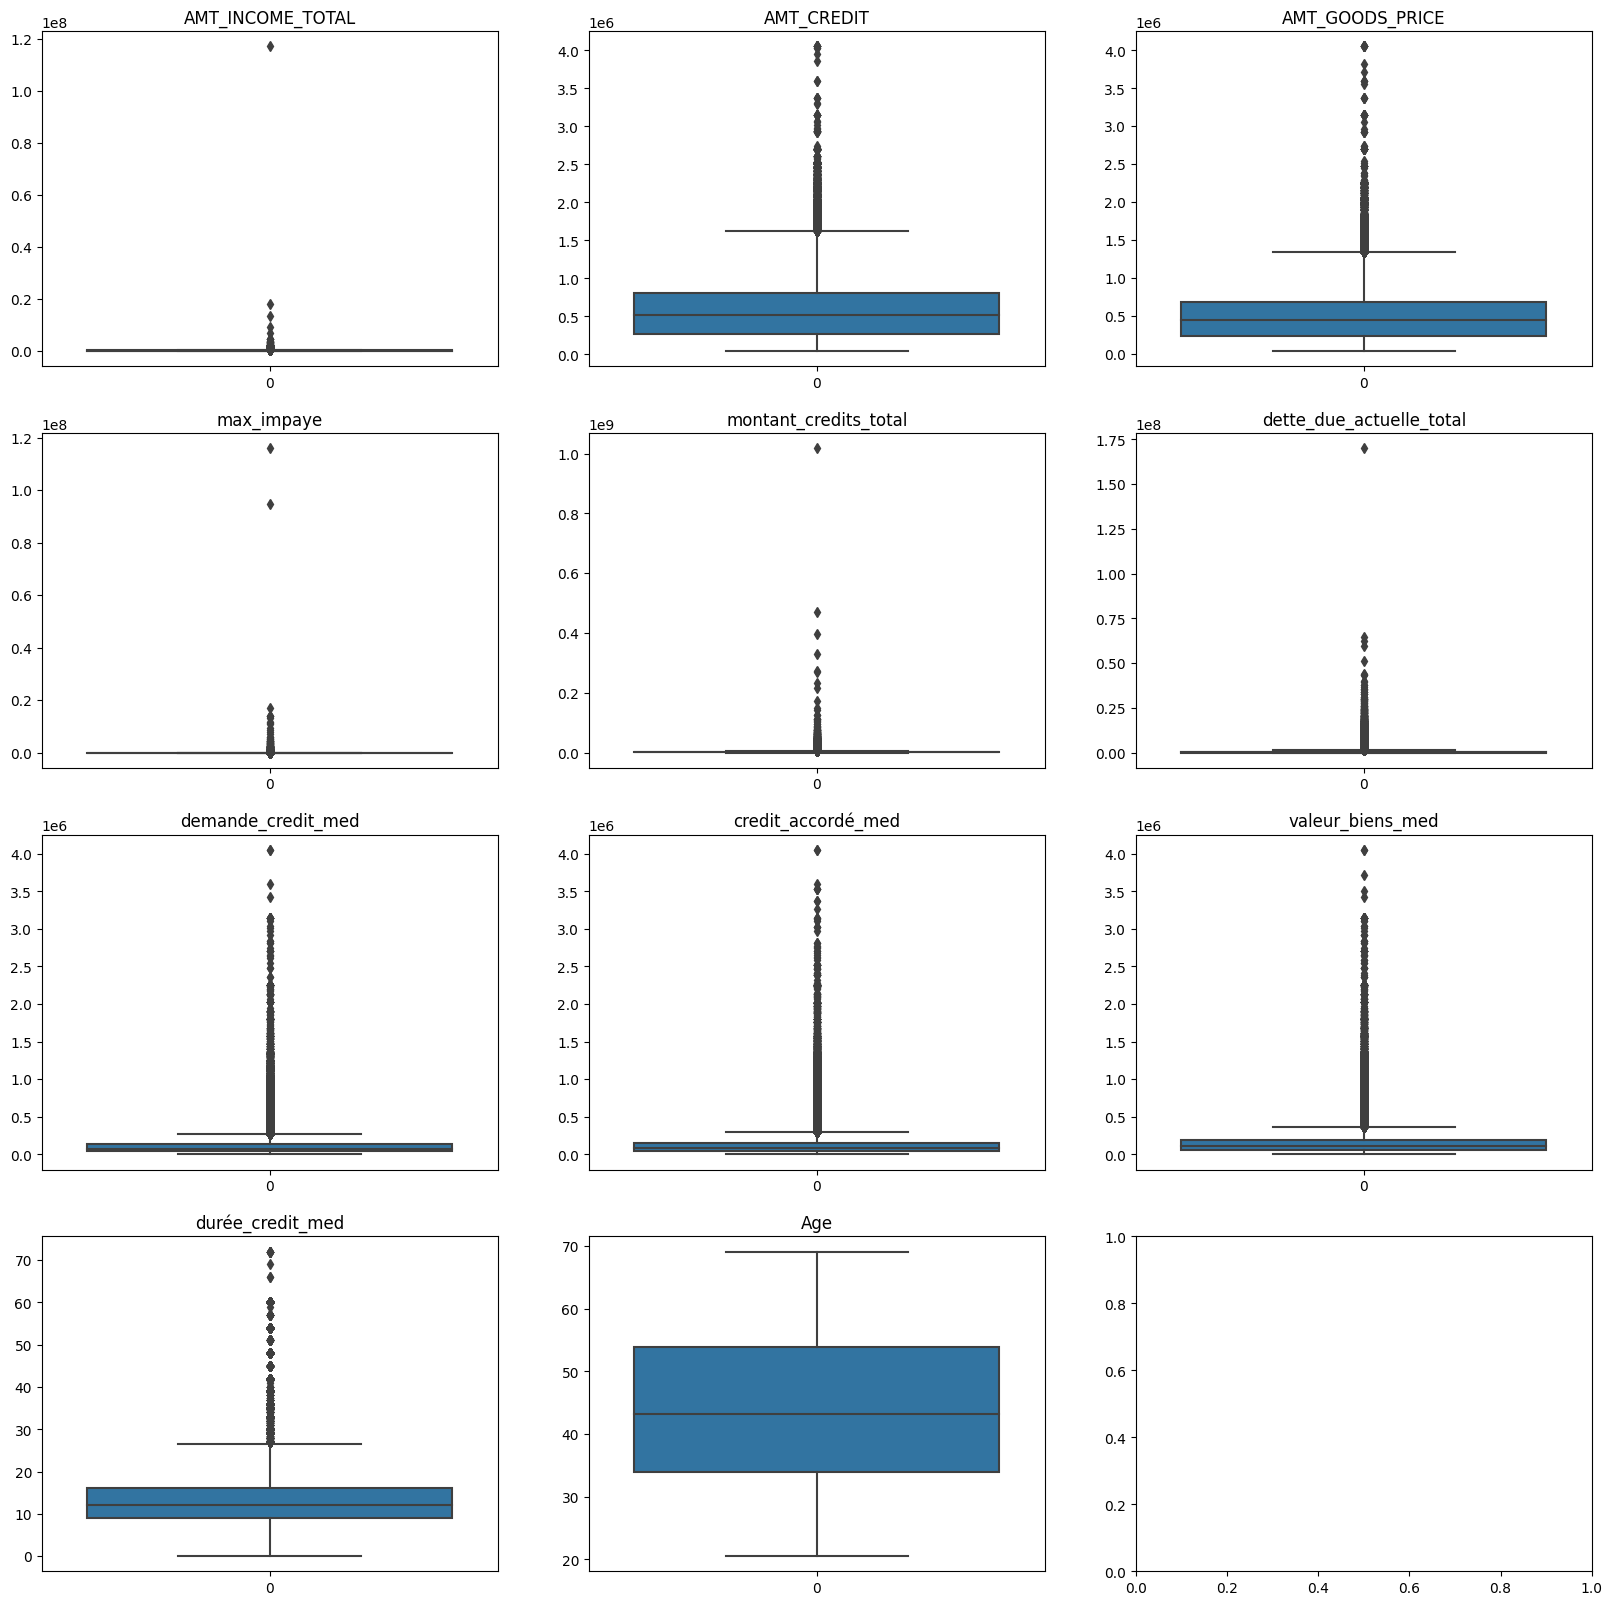

In [114]:
fig,axs = plt.subplots (4,3,figsize=(20,20))

for i,ax in zip (liste_analyse,axs.flatten()):
    sns.boxplot (df.iloc[:,i],ax=ax)
    ax.set_title (df.columns[i])

In [115]:
df = df.set_index (df.columns[0])
df.head()

,TARGET,FLAG_OWN_CAR,OWN_CAR_AGE,FLAG_OWN_REALTY,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,nb_credit,nb_credit_actifs,jour_dernier_credit,jours_retard_credit_cb,max_impaye,montant_credits_total,nb_prolongation_credit_max,dette_due_actuelle_total,demande_credit_med,credit_accordé_med,valeur_biens_med,CODE_REJECT_REASON_med,fidélité_client,accord_prêt_moy,durée_credit_med,taux_interet_cat,retard_payement_total,Somme_non_remboursée_total,Age
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,1,-1.0,0,0,1.0,202500.0,406597.5,351000.0,1.745205,0.083037,0.262949,0.139376,8.0,2.0,-103.0,0.0,5043.645,865055.565,0.0,245781.0,179055.0,179055.0,179055.0,XAP,0.0,1.000000,24.0,1.0,-1.063014,0.000,25.920548
100003,0,1,-1.0,1,0,2.0,270000.0,1293502.5,1129500.0,3.254795,0.311267,0.622246,NaN,4.0,1.0,-606.0,0.0,0.000,1017400.500,0.0,0.0,337500.0,348637.5,337500.0,XAP,2.0,1.000000,12.0,2.0,-0.490411,0.000,45.931507
100004,0,0,26.0,0,0,1.0,67500.0,135000.0,135000.0,0.616438,NaN,0.555912,0.729567,2.0,0.0,-408.0,0.0,0.000,189037.800,0.0,0.0,24282.0,20106.0,24282.0,XAP,0.0,1.000000,4.0,2.0,-0.063014,0.000,52.180822
100006,0,1,-1.0,0,0,2.0,135000.0,312682.5,297000.0,8.326027,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270000.0,267930.0,394708.5,XAP,2.0,0.888889,15.0,1.0,-0.849315,0.000,52.068493
100007,0,1,-1.0,0,0,1.0,121500.0,513000.0,513000.0,8.323288,NaN,0.322738,NaN,1.0,0.0,-1149.0,0.0,0.000,146250.000,0.0,0.0,191250.0,197932.5,191250.0,XAP,2.0,1.000000,15.0,2.5,-0.657534,29857.365,54.608219


In [116]:
df.to_csv ("data_save.csv")

In [117]:
df = pd.read_csv("data_save.csv",index_col=0)

In [118]:
df.isna().sum()

TARGET                             0
FLAG_OWN_CAR                       0
OWN_CAR_AGE                        0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
CNT_FAM_MEMBERS                    2
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_GOODS_PRICE                  278
DAYS_EMPLOYED                      0
EXT_SOURCE_1                  173378
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
nb_credit                      44020
nb_credit_actifs               44020
jour_dernier_credit            44020
jours_retard_credit_cb         44020
max_impaye                    123625
montant_credits_total          44020
nb_prolongation_credit_max     44020
dette_due_actuelle_total       51380
demande_credit_med             16454
credit_accordé_med             16454
valeur_biens_med               17429
CODE_REJECT_REASON_med         16454
fidélité_client                16454
accord_prêt_moy                16454
d